In [19]:
# Libraries
import pandas as pd
import matplotlib as plt

In [20]:
# Read in Sheet "PYTHON SHEET"
full_df = pd.read_csv("../data/rawData.csv", header=None)

In [21]:
# Set row 2 as column headers
full_df.columns = full_df.iloc[1]

# Drop row 2
full_df = full_df.drop(1)

# Reset index if needed
full_df = full_df.reset_index(drop=True)

In [22]:
# Store the first row as a separate array
first_row = full_df.iloc[0].values

# Drop the first row
full_df = full_df.drop(0)

# Reset index if needed
full_df = full_df.reset_index(drop=True)
df = full_df.copy()
df

1,Name,Sex,Weight (lbs),Height,Age,Calorie_AW,Calorie_TM
0,Ben Miller,M,168,71,22,32,38
1,Austin Higinbotham,M,185,69,21,33,36
2,Luke Fournier,M,184,70,21,30,36
3,Dan Mullen,M,230,73,22,44,38
4,Liam Rodgers,M,143,65,22,28,37
5,Michael Bolduc,M,148,69,22,26,36
6,Ivan Zivlak,M,200,75,22,36,33
7,Logan Green,M,145,74,22,25,36
8,Aiden Cook,M,171,69,22,36,35
9,Ray Mullin,M,165,72,21,37,39


In [23]:
df["Weight (lbs)"] = pd.to_numeric(df["Weight (lbs)"], errors="coerce")
df["Weight (kg)"] = df["Weight (lbs)"] * 0.453592  # 1 lb = 0.453592 kg
duration_hours = 3 / 60  # 3 minutes to hours
df["Calories_Burned_Formula"] = 10.1 * df["Weight (kg)"] * duration_hours
print(df.head())

1                 Name Sex  Weight (lbs) Height Age Calorie_AW Calorie_TM   
0           Ben Miller   M           168     71  22         32         38  \
1  Austin Higinbotham    M           185     69  21         33         36   
2        Luke Fournier   M           184     70  21         30         36   
3           Dan Mullen   M           230     73  22         44         38   
4         Liam Rodgers   M           143     65  22         28         37   

1  Weight (kg)  Calories_Burned_Formula  
0    76.203456                38.482745  
1    83.914520                42.376833  
2    83.460928                42.147769  
3   104.326160                52.684711  
4    64.863656                32.756146  


In [24]:
df["Weight (kg)"] = df["Weight (lbs)"] * 0.453592  # 1 lb = 0.453592 kg


duration_hours = 3 / 60

df["Calories_Burned_Formula"] = 10.1 * df["Weight (kg)"] * duration_hours

In [25]:
df["Weight (lbs)"] = df["Weight (lbs)"].astype(float)
df["Height"] = df["Height"].astype(float)
df["Age"] = df["Age"].astype(int)
df["Calorie_AW"] = df["Calorie_AW"].astype(float)
df["Calorie_TM"] = df["Calorie_TM"].astype(float)

df = df.dropna()
print(df)

1                  Name Sex  Weight (lbs)  Height  Age  Calorie_AW   
0            Ben Miller   M         168.0    71.0   22        32.0  \
1   Austin Higinbotham    M         185.0    69.0   21        33.0   
2         Luke Fournier   M         184.0    70.0   21        30.0   
3            Dan Mullen   M         230.0    73.0   22        44.0   
4          Liam Rodgers   M         143.0    65.0   22        28.0   
5        Michael Bolduc   M         148.0    69.0   22        26.0   
6           Ivan Zivlak   M         200.0    75.0   22        36.0   
7           Logan Green   M         145.0    74.0   22        25.0   
8            Aiden Cook   M         171.0    69.0   22        36.0   
9            Ray Mullin   M         165.0    72.0   21        37.0   
10  Jackson Petroccione   M         205.0    73.0   26        47.0   
11          Kyle Durgin   M         197.0    71.0   21        43.0   
12      Johan Feilscher   M         175.0    73.0   23        37.0   
13             Minu 

In [26]:
df["AW_Accuracy"] = (
    (df["Calories_Burned_Formula"] - df["Calorie_AW"]) / df["Calories_Burned_Formula"]
) * 100
df["TM_Accuracy"] = (
    (df["Calories_Burned_Formula"] - df["Calorie_TM"]) / df["Calories_Burned_Formula"]
) * 100

print(df)

1                  Name Sex  Weight (lbs)  Height  Age  Calorie_AW   
0            Ben Miller   M         168.0    71.0   22        32.0  \
1   Austin Higinbotham    M         185.0    69.0   21        33.0   
2         Luke Fournier   M         184.0    70.0   21        30.0   
3            Dan Mullen   M         230.0    73.0   22        44.0   
4          Liam Rodgers   M         143.0    65.0   22        28.0   
5        Michael Bolduc   M         148.0    69.0   22        26.0   
6           Ivan Zivlak   M         200.0    75.0   22        36.0   
7           Logan Green   M         145.0    74.0   22        25.0   
8            Aiden Cook   M         171.0    69.0   22        36.0   
9            Ray Mullin   M         165.0    72.0   21        37.0   
10  Jackson Petroccione   M         205.0    73.0   26        47.0   
11          Kyle Durgin   M         197.0    71.0   21        43.0   
12      Johan Feilscher   M         175.0    73.0   23        37.0   
13             Minu 

/var/folders/4h/m_s_yrg93y3_p1g1l6ldnm600000gn/T/ipykernel_44870/419237899.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4h/m_s_yrg93y3_p1g1l6ldnm600000gn/T/ipykernel_44870/419237899.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
df.iloc[14]

1
Name                       Trym Kyvaag
Sex                                  M
Weight (lbs)                     213.0
Height                            74.0
Age                                 22
Calorie_AW                        47.0
Calorie_TM                        36.0
Weight (kg)                  96.615096
Calories_Burned_Formula      48.790623
AW_Accuracy                   3.670016
TM_Accuracy                  26.215331
Name: 14, dtype: object

In [28]:
df.iloc[6]

1
Name                       Ivan Zivlak
Sex                                  M
Weight (lbs)                     200.0
Height                            75.0
Age                                 22
Calorie_AW                        36.0
Calorie_TM                        33.0
Weight (kg)                    90.7184
Calories_Burned_Formula      45.812792
AW_Accuracy                  21.419328
TM_Accuracy                  27.967717
Name: 6, dtype: object

In [29]:
import dash
from dash import dcc, html, Input, Output, State
import dash_bootstrap_components as dbc
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split


X = df[["Weight (lbs)", "Height", "Age", "Sex"]]
y = (
    (df["Calorie_TM"] - df["Calories_Burned_Formula"]) / df["Calories_Burned_Formula"]
) * 100
X = pd.get_dummies(X, columns=["Sex"], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = XGBRegressor(
    n_estimators=10000,  # Number of boosting rounds
    learning_rate=0.1,  # Step size shrinkage used in update to prevent overfitting
    max_depth=10,  # Maximum depth of a tree
    min_child_weight=1,  # Minimum sum of instance weight needed in a child
    gamma=0,  # Minimum loss reduction required to make a further partition on a leaf node of the tree
    subsample=0.8,  # Subsample ratio of the training instance
    colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
    objective="reg:squarederror",  # Learning objective
    random_state=42,
)
model.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_metric="rmse",  # Root Mean Squared Error
    early_stopping_rounds=100,  # Stop training if no improvement in 'eval_metric'
    verbose=False,
)

/usr/local/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [30]:
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
modal = html.Div(
    [
        dbc.Modal(
            [
                dbc.ModalHeader("Enter Your Information"),
                dbc.ModalBody(
                    [
                        dcc.Input(
                            id="weight",
                            type="number",
                            placeholder="Enter your weight (lbs)",
                        ),
                        dcc.Input(
                            id="height",
                            type="number",
                            placeholder="Enter your height (inches)",
                        ),
                        dcc.Input(
                            id="age", type="number", placeholder="Enter your age"
                        ),
                        dcc.Dropdown(
                            id="sex",
                            options=[
                                {"label": "Male", "value": "M"},
                                {"label": "Female", "value": "F"},
                            ],
                            placeholder="Select your gender",
                        ),
                    ]
                ),
                dbc.ModalFooter(
                    [
                        dbc.Button(
                            "Close", id="close-modal-button", className="mr-auto"
                        ),
                        dbc.Button("Predict", id="predict-button", className="ml-auto"),
                    ]
                ),
            ],
            id="modal",
        ),
        html.Div(id="accuracy-output"),
    ]
)

app.layout = html.Div(
    [
        html.H1("Treadmill Calories Accuracy Predictor"),
        html.Button("Open Modal", id="open-modal-button"),
        modal,
    ]
)


@app.callback(
    Output("modal", "is_open"),
    [Input("open-modal-button", "n_clicks"), Input("close-modal-button", "n_clicks")],
    [State("modal", "is_open")],
)
def toggle_modal(open_clicks, close_clicks, is_open):
    if open_clicks or close_clicks:
        return not is_open
    return is_open


@app.callback(
    Output("accuracy-output", "children"),
    [Input("predict-button", "n_clicks")],
    [
        State("weight", "value"),
        State("height", "value"),
        State("age", "value"),
        State("sex", "value"),
    ],
)
def predict_accuracy(n_clicks, weight, height, age, sex):
    if n_clicks is not None:
        if not all([weight, height, age, sex]):
            raise PreventUpdate  # type: ignore
        prediction = model.predict([[weight, height, age, 1 if sex == "M" else 0]])[0]
        return f"Predicted treadmill calories accuracy: {prediction}%"


if __name__ == "__main__":
    app.run_server(debug=True)

<Axes: >

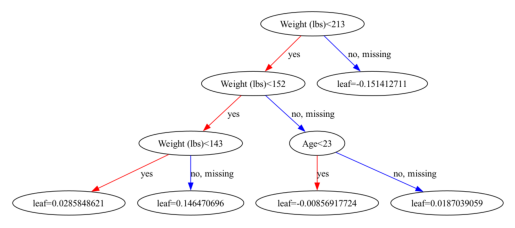

In [34]:
from xgboost import plot_tree

plot_tree(model, num_trees=34)